<font size=4 color='blue'>
    
# <center> Clase 6, junio 30 del 2021</center>

<font size=4 color='blue'>
    
# <center> Machines that use Unsupervised Learning </center>

<font size=5 color='blue'>
Extracting information from a dataset using clustering

<font size=4 color='black'>

[Article about Kmeans](./Literature/Kmeans_article.pdf)

<font size=5 color='blue'>

Kmeans Algorithm


<font size=4 color='black'>

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K-pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 
    
It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. 
    
It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. 
    
The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

<font size=4 color='black'>

The way kmeans algorithm works is as follows:

    Specify number of clusters K.
    
    Initialize centroids by first shuffling the dataset and then randomly selecting K 
    data points for the centroids without replacement.
    
    Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

    Compute the sum of the squared distance between data points and all centroids.
    Assign each data point to the closest cluster (centroid).
    
    Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

<font size=4 color='black'>

The used metric to detect the clusters is:

    
$$ J = \sum_{i=1}^m \sum_{k=1}^K {w_i}_k ||x^{i} - \mu_k||^2$$
    
where ${w_i}_k$ = 1 for data point $x_i$ if it belongs to cluster k; otherwise, ${w_i}_k$=0. Also, $\mu_k$ is the centroid of $x_i$’s cluster.


<font size=5 color='blue'>

Examples of systems with iformation that can separated in clusters

<font size=4 color='blue'>
    
[Machine learning for data-driven discovery in solid Earth geoscience](https://science.sciencemag.org/content/363/6433/eaau0323)

<font size=4 color='blue'>

# <center> Geyser’s Eruptions </center>

<font size=4 color='black'>
Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA

In [1]:
from IPython.display import HTML

HTML("""
<video width="520" height="340" controls>
  <source src="yell-InDepth-Geysers2_640x360.mp4" type="video/mp4">
</video>
""")


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
import sklearn 



In [3]:
matplotlib.__version__

'3.3.4'

In [4]:
sklearn.__version__

'0.24.2'

In [5]:
#from sklearn.datasets.samples_generator import (make_blobs,
#                                                make_circles,
#                                                make_moons)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

<font size=4 color='blue'>

[sklearn_paper](./Literature/Scikit-learn_2011.pdf)

<font size=4 color='black'>

The Python code of sklearn for KMeans is the file _kmeans.py

<font size=5 color='blue'>

Reading Geyser’s Eruptions data set

<font size=4 color='blue'>
    
[Geyser’s Eruptions data set](https://www.kaggle.com/janithwanni/old-faithful)

In [6]:
# Import the data
df = pd.read_csv('old_faithful.csv')

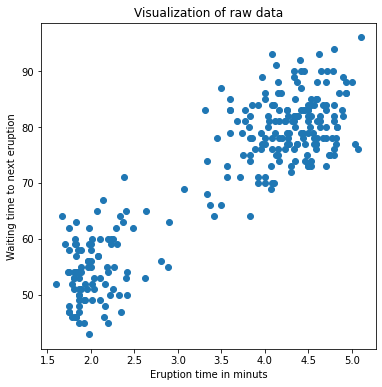

In [7]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in minuts')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [8]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(272, 2)


In [9]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


<font size=5 color='blue'>
Normalizing information data

In [10]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

In [11]:
print(type(X_std))
print(X_std.shape)

<class 'numpy.ndarray'>
(272, 2)


In [12]:
print(X_std[0:5][:])

[[ 0.09849886  0.59712344]
 [-1.48145856 -1.24518118]
 [-0.13586149  0.22866251]
 [-1.05750332 -0.6556437 ]
 [ 0.91744345  1.03927655]]


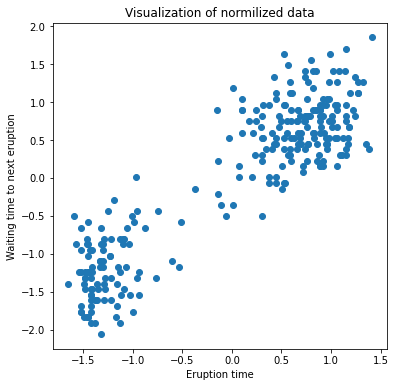

In [13]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.xlabel('Eruption time')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of normilized data');

<font size=5 color='blue'>
Generating the architecture of the learning model

In [14]:
# Run local implementation of kmeans
model = KMeans(n_clusters=2, max_iter=100, init='random',n_init=10)

<font size=5 color='blue'>
Building a Machine that learns to find clusters using this model

In [15]:
#km.fit(X_std)
model.fit(X_std)

KMeans(init='random', max_iter=100, n_clusters=2)

<font size=5 color='blue'>
Extracting information of the recognized clusters

In [16]:
#Obtaining clusters centroid
centroids = model.cluster_centers_

#To obtain the labels of each cluster
labels = model.labels_

<font size=5 color='blue'>
Plotting the clusters

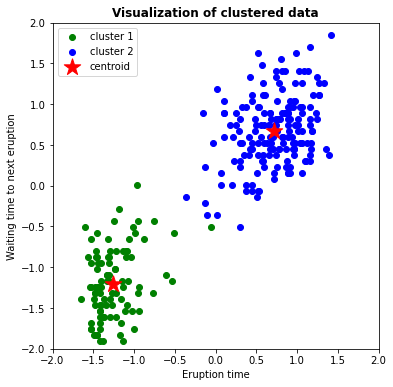

In [17]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels == 0, 0], X_std[labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels == 1, 0], X_std[labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

<font size=4 color='blue'>
    
# <center> Iris Clustering </center>

<img src="iris.jpg">

<font size=5 color='blue'>
Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

<font size=4 color='black'>
For visualizing the clusters, we will use only three of the variables associated to the iris flowers: petal width (X[:,3]), sepal length (X[:,0]), and petal length (X[:,2]). 

In [18]:
import numpy as np
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [19]:
np.__version__

'1.20.1'

<font size=5 color='blue'>

Reading Iris data set

<font size=4 color='blac'>
    
[Iris Data set](https://archive.ics.uci.edu/ml/datasets/iris)

In [20]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# y is only used to generate the picture of the Ground Truth

In [21]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [22]:
print(X[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


<font size=5 color='blue'>
Generating the architecture for 3 different learning models: different number of clusters and different way of centroids initialization

In [23]:
np.random.seed(5)

models = [('k_means_iris_8', KMeans(n_clusters=8, n_init=10)),
              ('k_means_iris_3', KMeans(n_clusters=3, n_init=10)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

<font size=5 color='blue'>
Machines that learn to find clusters using the tree different models

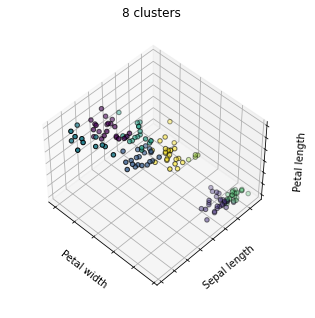

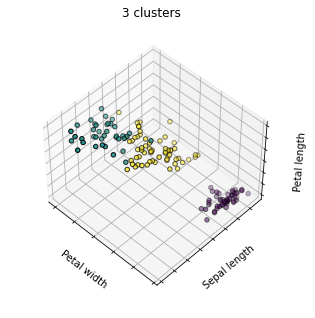

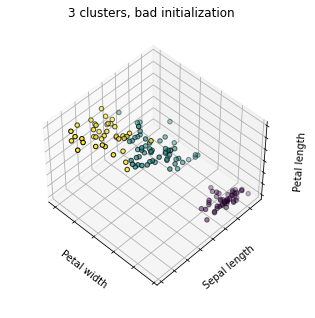

In [24]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, model in models:
    fig = plt.figure(fignum, figsize=(6, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float64), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

<font size=5 color='blue'>
Ground Truth 
<font size=4 color='black'>
   
It means, checking Machine Learning accuracy with real world

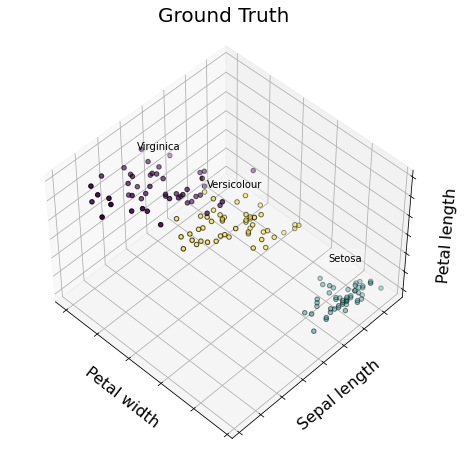

In [25]:
# Plot the ground truth (Verdad fundamental, verdad de la distribución)

fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float64)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width', size=16)
ax.set_ylabel('Sepal length', size=16)
ax.set_zlabel('Petal length', size=16)
ax.set_title('Ground Truth', size=20)
ax.dist = 11


<font size=4 color='blue'>

# <center> Digits clustering </center>

In [26]:
import numpy as np
from PIL import Image
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


<font size=5 color='blue'>

Reading digits data set

<font size=4 color='black'>

[digits data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

In [27]:
digits = load_digits()

data = digits.data


In [28]:
print(data.shape)

(1797, 64)


In [29]:
sample_num = 10

print(data[sample_num,:])

[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


In [30]:
image_0=data[sample_num]

In [31]:
image=image_0.reshape(8,8)

In [32]:
print(image.shape)

(8, 8)


(-0.5, 7.5, 7.5, -0.5)

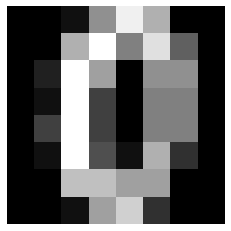

In [33]:
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')

In [34]:
# Images colors will be inverted
data=255.0-data

(-0.5, 7.5, 7.5, -0.5)

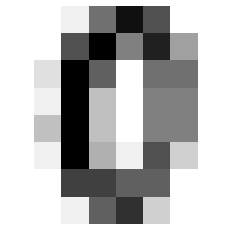

In [35]:
plt.imshow(data[sample_num,:].reshape(8,8), cmap=plt.cm.gray)
plt.axis('off')

<font size=5 color='blue'>
Generating the architecture of the learning model

In [36]:
np.random.seed(1)
model = KMeans(n_clusters=10,init='random')

<font size=5 color='blue'>
Machine that uses this model to find the clusters

In [37]:
model.fit(data)

KMeans(init='random', n_clusters=10)

<font size=5 color='blue'>

Predicting the closest cluster to which each sample belongs in the data

In [38]:
my_cluster = model.predict(data)
print(my_cluster.shape)
print(my_cluster)

(1797,)
[3 9 9 ... 9 7 7]


<font size=5 color='blue'>

Showing the predicted digits clusters

cluster 0
182 elements


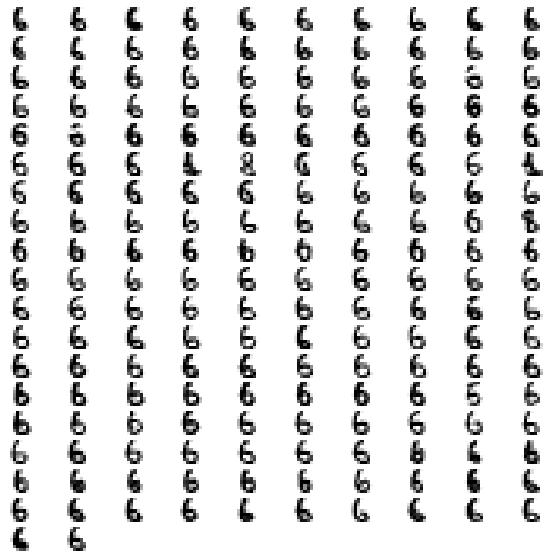

cluster 1
156 elements


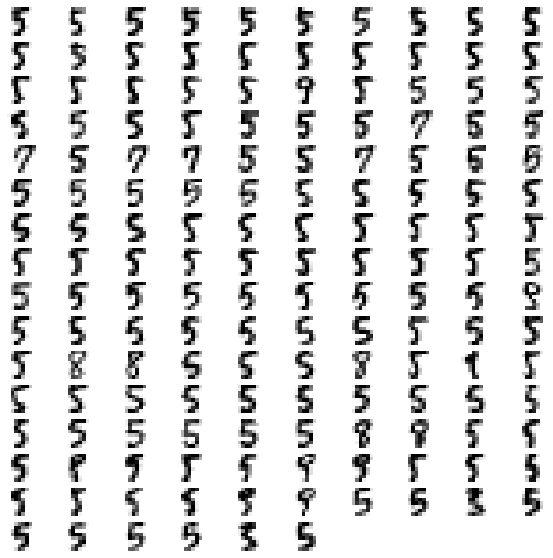

cluster 2
197 elements


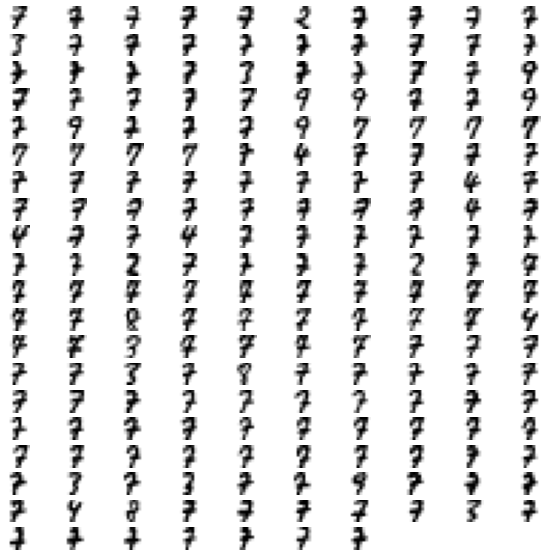

cluster 3
179 elements


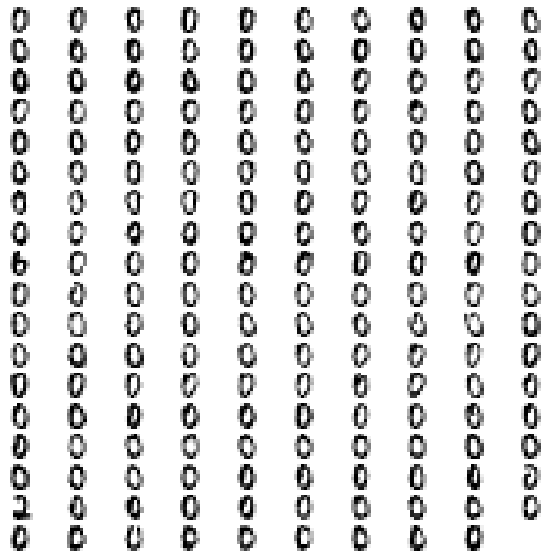

cluster 4
180 elements


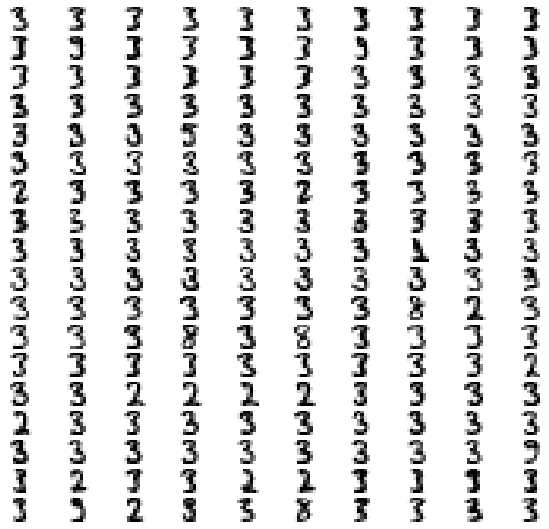

cluster 5
176 elements


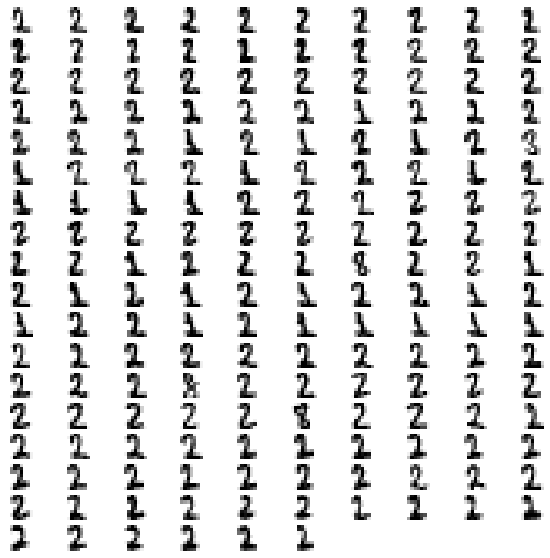

cluster 6
166 elements


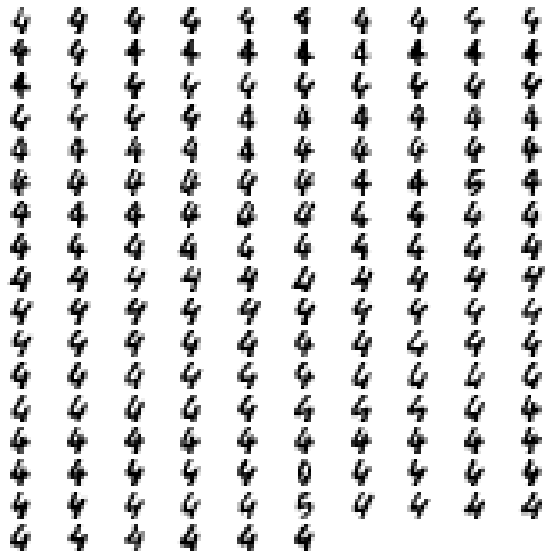

cluster 7
242 elements


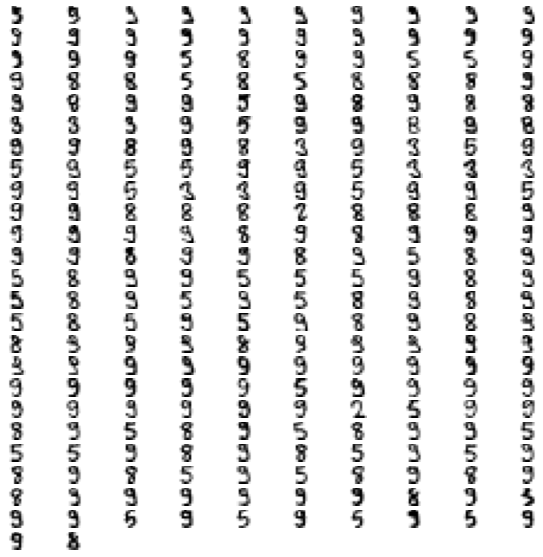

cluster 8
93 elements


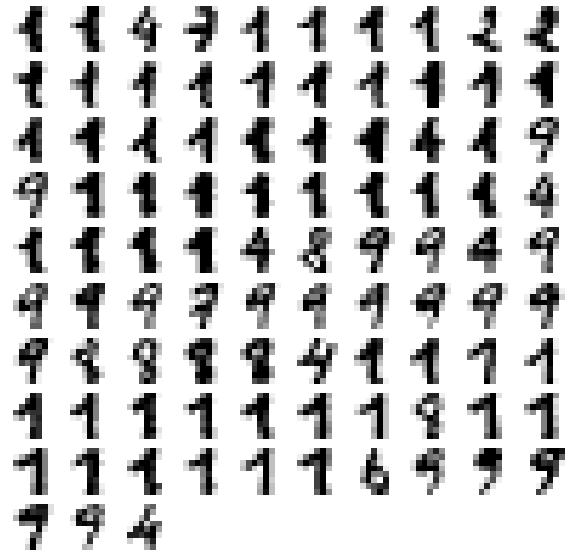

cluster 9
226 elements


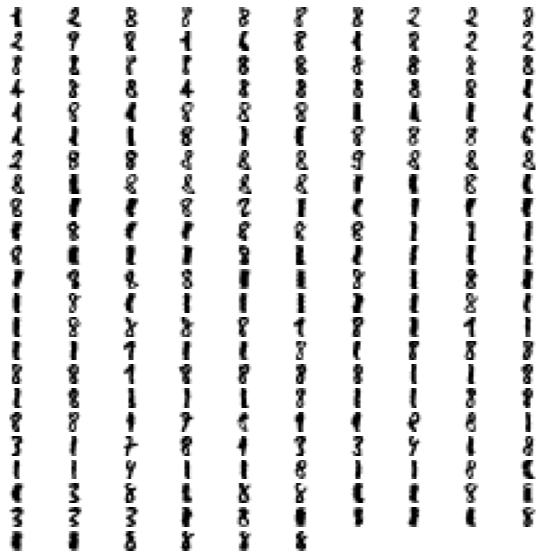

In [39]:
for i in range(0,10):  
    
    row = np.where(my_cluster==i)[0] 
    num = row.shape[0]      
    
    r = int(np.floor(num/10.))    
    print("cluster " + str(i))
    print(str(num) + " elements")

    plt.figure(figsize = (10,10))

    # Showing the digits in each cluster
    for k in range(0, num):
        
        plt.subplot(r+1, 10, k+1)
               
        imagen = data[row[k], ]
        
        imagen = imagen.reshape(8, 8)
        
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')

    plt.show()